# NOTEBOOK 2: PREDICTING TIME TO SELL MODELLING

## Necessary Libraries

This notebook will utilize the following libraries for the model predictions:

In [22]:
#Importing necessary libraries

#Libraries to import and analyze data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

#Libraries for modelling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
    #Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
    #Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
    #Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
    #Validation & Evaluation of Model Performance
from sklearn.metrics import r2_score

## Importing Data

First, the data is imported and the independent variables are split from the dependent variable (the variable we want to predict).

In [23]:
#Importing Modelling Data
features_import = pd.read_csv('~/Desktop/DDB/ai_business/datasets/features.csv', sep = ';')
#Removing first column which is "Unnamed"
features = features_import.iloc[:, 1:]
features.head(3)

,livingspace,plotarea,constructionyear,rooms,bathroom
0,105,204,1985,5,1
1,78,132,1986,4,1
2,112,248,1969,5,1
3,119,152,1974,5,1
4,143,580,1979,4,1
...,...,...,...,...,...
50649,108,280,1980,4,1
50650,140,183,1980,6,1
50651,131,268,1963,5,1
50652,139,183,2017,5,1


In [24]:
#Splitting the data into independent and dependent variables
#Independent
X = features.iloc[:, :-1].values
X = np.array(X)
print(pd.DataFrame(X))

#Dependent
Y = features['days_till_sold'].values
print(pd.DataFrame(Y))

             0         1         2         3         4         5         6   \
0      0.022687  0.007394  0.000000  0.001189  0.009245  0.000000  0.005987   
1      0.027982  0.000000  0.022138  0.000000  0.000800  0.011183  0.023545   
2      0.000000  0.000000  0.000418  0.000000  0.001869  0.000000  0.092261   
3      0.022065  0.000028  0.000000  0.000000  0.016810  0.000000  0.013598   
4      0.000965  0.000861  0.000000  0.006831  0.013774  0.000925  0.008954   
...         ...       ...       ...       ...       ...       ...       ...   
50649  0.013529  0.000000  0.000000  0.000000  0.009660  0.000000  0.028071   
50650  0.002739  0.088473  0.026179  0.000351  0.004336  0.070294  0.025694   
50651  0.000000  0.000000  0.000000  0.000000  0.014653  0.000000  0.022937   
50652  0.008729  0.000039  0.000000  0.000542  0.072851  0.000000  0.032787   
50653  0.036544  0.000000  0.001895  0.000893  0.034566  0.000000  0.027983   

             7         8         9         10     1

## Encoding of Variables (commented)

To ensure that the model can predict in the best way possible, the column containing the Topics is encoded. This means a row will not contain the information "Topic 1", but instead each topic will receive a number, eg. 1.0.0.0.
If only four topics would be present, the first topic would receive the number 1.0.0.0., the second topic 0.1.0.0. and so on and so forth.

In [25]:
#Encoding the main_topic category for better data processing
#ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
#X = np.array(ct.fit_transform(X))

## Splitting the Data

Now the data is split into a Training Set, a Test Set and a Validation Set.
We use train and validation for model fitting, while test will be used to evaluate the final model performance.

In [26]:
#Splitting the Data 

#1st Split into 20% Test
x_data, x_test, y_data, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

#Splitting the remaining Data into 80% Train and 20% Validation
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1)

## Feature Scaling

Using Standardization, a "standard normal" for each random variable is obtained, with a mean of 0 and a standard deviation of 1. This is important to compare values that have different units (eg. 1k EUR vs 2 bathrooms).
Having variables at different scales can lead to skewing the analysis and therefore influence the model performance negatively.
Standardization assumes that data has a Gaussian (bell curve) distribution, although this does not strictly have to be true in order for Standardization to work. It is useful to use Standardization when a dataset contains varying scales and when applying linear regressions.
In this case, since the model is supposed to predict time to sell, a Regression Model will be used, therefore Standardization makes sense.

In [27]:
#Standardizing all numerical variables
sc = StandardScaler()
x_train[:, -6:-1] = sc.fit_transform(x_train[:, -6:-1])
x_validation[:, -6:-1] = sc.fit_transform(x_validation[:, -6:-1])
x_test[:, -6:-1] = sc.fit_transform(x_test[:, -6:-1])

In [28]:
#Visualizing the now standardized sets
print(pd.DataFrame(x_train[:, -6:-1]).head(3))
print(pd.DataFrame(x_validation[:, -6:-1]).head(3))
print(pd.DataFrame(x_test[:, -6:-1]).head(3))

          0         1         2         3         4
0 -0.130825 -0.108320  0.287185  0.380130  0.817803
1 -0.682715 -0.135388 -0.264374  0.578133 -0.036664
2  0.150638 -0.027115 -0.763680  1.139139 -0.036664
          0         1         2         3         4
0 -0.263016 -0.548168 -0.199564  1.656203  0.805528
1 -1.258787 -1.464780 -0.728011 -0.260838 -0.896455
2 -0.278141  0.449322 -0.309899  0.546337 -0.045463
          0         1         2         3         4
0  0.846890  1.774237  0.568797  0.964094  0.781204
1 -0.012955 -0.549669 -0.292601  0.525630  0.781204
2 -0.967768  0.064697 -0.326381 -0.047747 -0.055588


## Random Forest Model

### . . . . . Initial Model

Using a Random Forest Regression Model, we will predict time to sell.

In [130]:
#Create Random Frest Regression Model (RF)
initial_rf = RandomForestRegressor(bootstrap = True, max_depth = 90, n_estimators = 500, random_state = 1)
initial_rf.fit(x_train, y_train)

validation_rf = RandomForestRegressor(bootstrap = True, max_depth = 90, n_estimators = 500, random_state = 1)
validation_rf.fit(x_validation, y_validation)

RandomForestRegressor(max_depth=90, n_estimators=500, random_state=1)

In [55]:
#Predict Time to Sell with RF
initial_rf_pred = initial_rf.predict(x_test)
initial_rf_pred

array([36.094, 32.472, 28.49 , ..., 32.178, 28.398, 37.632])

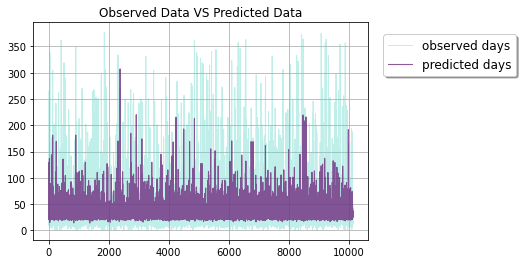

In [121]:
#Visualize Prediction VS Testset
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="observed days", color = '#62D8CC', alpha = 0.4)
plt.plot(x_ax, initial_rf_pred, linewidth=1.1, color = '#722E80', label="predicted days", alpha = 0.8)
plt.title("Observed Data VS Predicted Data")
plt.legend(bbox_to_anchor = (1.01, 1), loc = 'upper left', borderaxespad = 1, fontsize = 12, fancybox=True, shadow=True)
plt.grid(True)
plt.show()

One can calculate the level of variation in the model outcome, based on the variables used for prediction, using the R-squared (R2) metric. A high R2 would implicate that there is a high correlation between the observed (actual) outcome and the predicted outcome.

In [57]:
#Validate Model with R2
initial_rf_r2 = r2_score(y_test, initial_rf_pred)
initial_rf_r2

0.10289830231615693

In this case, the R2 is close to 0, which implies a very weak model. Perhaps by tuning the parameters in the following section, our model performance can be increased.

### . . . . . Hyperparameter Tuning

In [58]:
#Check list of random forest model parameters
print("Parameters currently in use: \n")
initial_rf.get_params()

Parameters currently in use: 



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 90,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [59]:
#Establishing Parameter Grid
rf_param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    #'max_features': [2, 3, 5],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10],
    'n_estimators': [500, 600, 800]
}

For Hyperparameter Tuning, a param_grid dictionary has been created with six parameters, focussing on some of the most important settings for the Random Forest Model:
- the method for sampling data points with or without replacement (bootstrap),
- the number of levels in each decision tree (max_depth),
- the number of features that are considered for splitting the leaf nodes (max_features),
- the minimum number of data points allowed in each leaf node (min_samples_leaf),
- the minimum number of data points placed in each node before the node is split (min_samples_split) and
- the number of trees in the forest (n_estimators).

Through this dictionary, the aim is to find which values of the ones given provide the highest accuracy for the model.
With this dictionary, it is possible to check for (1 * 4 * 2 * 3 * 2 * 3) combinations 

_PLEASE NOTE: For the purpose of this project, due to time constraints, the number of parameters had eventually be reduced._

In [61]:
#Creating a new Random Forest Model
rf = RandomForestRegressor()

#Creating the Grid Search Model using the Random Forest with 5 folds
rf_grid_search = GridSearchCV(rf, param_grid = rf_param_grid, cv = 5, n_jobs = -1, verbose = 2)
#Fitting the grid search to the data
rf_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/vanyamantek/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'n_estimators': [500, 600, 800]},
             verbose=2)

In [62]:
#Looking for the best parameters to use
rf_grid_search.best_params_

{'bootstrap': True, 'max_depth': 90, 'n_estimators': 800}

In [65]:
#Storing new RF model with hypertuned parameters
hypertuned_rf = RandomForestRegressor(bootstrap = True, max_depth = 90, n_estimators = 800)
#max_depth = 90, max_features = 3, min_samples_leaf = 4, min_samples_split = 10, random_state = 1)
hypertuned_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=90, n_estimators=800)

In [66]:
#Predict Time to Sell with RF
hypertuned_rf_pred = hypertuned_rf.predict(x_test)
hypertuned_rf_pred

array([35.0975 , 33.445  , 28.655  , ..., 32.86875, 27.38125, 38.4175 ])

In [122]:
#Validate Model with R2
hypertuned_rf_r2 = r2_score(y_test, hypertuned_rf_pred)
hypertuned_rf_r2

0.1009598144504229

## Neural Network Model - Regression

### . . . . . Initial Model

In [82]:
#Setting up initial Neural Network Model
initial_mlp = MLPRegressor(activation = 'relu', solver = 'adam', batch_size = 'auto', learning_rate_init = 0.001, hidden_layer_sizes = (8, 8, 8), max_iter = 500, random_state = 1)
initial_mlp.fit(x_train, y_train)

validation_mlp = MLPRegressor(activation = 'relu', solver = 'adam', batch_size = 'auto', learning_rate_init = 0.001, hidden_layer_sizes = (8, 8, 8), max_iter = 500, random_state = 1)
validation_mlp.fit(x_validation, y_validation)

/Users/vanyamantek/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(8, 8, 8), max_iter=500, random_state=1)

In [99]:
#Storing Prediction
initial_mlp_pred = initial_mlp.predict(x_test)
initial_mlp_pred

array([44.35788001, 28.25720323, 26.53598055, ..., 26.99513516,
       25.35582699, 34.95698288])

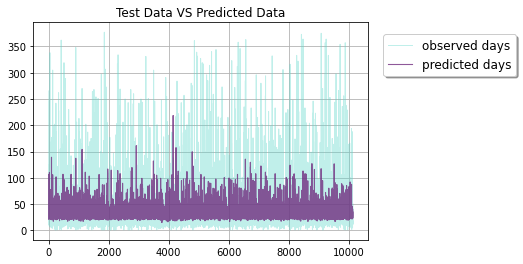

In [39]:
#Visualize Prediction VS Testset
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="observed days", color = '#62D8CC', alpha = 0.4)
plt.plot(x_ax, initial_mlp_pred, linewidth=1.1, color = '#722E80', label="predicted days", alpha = 0.8)
plt.title("Test Data VS Predicted Data")
plt.legend(bbox_to_anchor = (1.01, 1), loc = 'upper left', borderaxespad = 1, fontsize = 12, fancybox=True, shadow=True)
plt.grid(True)
plt.show()

We now use the Loss Function which encodes the error of the prediction by the Neural Network on a given observation with regards to the observation's true value.

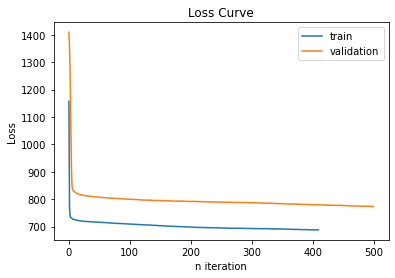

In [148]:
#Visualizing the values of the Loss Function
plt_initial_mlp_loss = pd.DataFrame(initial_mlp.loss_curve_)
plt_initial_mlp_loss = plt_initial_mlp_loss.rename(columns= { 0: 'train' })
plt_validation_mlp_loss = pd.DataFrame(validation_mlp.loss_curve_)
plt_validation_mlp_loss = plt_validation_mlp_loss.rename(columns= { 0: 'validation' })

compare_mlp = pd.concat([plt_initial_mlp_loss.reset_index(drop = True), plt_validation_mlp_loss.reset_index(drop = True)], axis=1)

plt.plot(compare_mlp)
plt.title("Loss Curve")
plt.ylabel("Loss")
plt.xlabel("n iteration")
plt.legend(labels = ['train', 'validation'])


Our model currently is very underfit. This means that our model did not learn the training dataset well enough in order to obtain reliable results, as the training error value can be quite high.
We can see that it is underfit because the line is very flat, almost immediately, while it slowly declines more and more. This is an indication that our model does not have capacity for the complexity of our dataset.


In [100]:
#Validating the Model with R2
initial_mlp_r2 = r2_score(y_test, initial_mlp_pred)
initial_mlp_r2

0.10637835451818023

Also our R2 value is quite low in this model as well.

### . . . . . Hyperparameter Tuning

In [41]:
#Find parameters currently in use
print("Parameters currently in use: \n")
initial_mlp.get_params()

Parameters currently in use: 



{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (8, 8, 8),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [44]:
#Establishing Parameter Grid
mlp_param_grid = {
    'activation': ['relu'],
    'solver': ['adam'],
    'batch_size':  ['auto', 20, 40, 60],
    'learning_rate_init': [0.001, 0.005],
    'hidden_layer_sizes': [(6, 6, 6), (8, 8, 8), (10, 10, 10)],
    'max_iter': [500, 1000, 2000]
}

In [45]:
#Creating a new Neural Network Model
mlp = MLPRegressor()

#Creating the Grid Search Model using the Neural Network with 5 folds
mlp_grid_search = GridSearchCV(mlp, param_grid = mlp_param_grid, cv = 5, n_jobs = -1, verbose = 2)
#Fitting the grid search to the data
mlp_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'batch_size': ['auto', 20, 40, 60],
                         'hidden_layer_sizes': [(6, 6, 6), (8, 8, 8),
                                                (10, 10, 10)],
                         'learning_rate_init': [0.001, 0.005],
                         'max_iter': [500, 1000, 2000], 'solver': ['adam']},
             verbose=2)

In [46]:
#Looking for the best parameters to use
mlp_grid_search.best_params_

{'activation': 'relu',
 'batch_size': 40,
 'hidden_layer_sizes': (6, 6, 6),
 'learning_rate_init': 0.001,
 'max_iter': 500,
 'solver': 'adam'}

In [47]:
#Storing new Neural Network model with hypertuned parameters
hypertuned_mlp = MLPRegressor(activation = 'relu', batch_size = 40, hidden_layer_sizes = (6, 6, 6), learning_rate_init = 0.001, max_iter = 500, solver = 'adam', random_state = 1)
hypertuned_mlp.fit(x_train, y_train)

MLPRegressor(batch_size=40, hidden_layer_sizes=(6, 6, 6), max_iter=500,
             random_state=1)

In [67]:
#Predict Time to Sell with Neural Network
hypertuned_mlp_pred = hypertuned_mlp.predict(x_test)
hypertuned_mlp_pred

array([41.54503773, 29.19995175, 26.1017776 , ..., 20.27066739,
       27.10986683, 35.54544856])

In [128]:
#Validate Model with Neural Network
hypertuned_mlp_r2 = r2_score(y_test, hypertuned_mlp_pred)
hypertuned_mlp_r2

0.10897433940324408

## Evaluation

In this last section, we will evaluate both models' performances.

In [127]:
print("\nInitial Random Forest Model R2:", initial_rf_r2)
print("Hypertuned Random Forest Model R2:", hypertuned_rf_r2)
print("Hypertuned Random Forest Model Mean Squared Error:", mean_squared_error(y_test, hypertuned_rf_pred))
print("\nInitial Neural Network Model R2", initial_mlp_r2)
print("Hypertuned Neural Network Model R2", hypertuned_mlp_r2)
print("Hypertuned Neural Network Model Mean Squared Error:", mean_squared_error(y_test, hypertuned_mlp_pred))


Initial Random Forest Model R2: 0.10289830231615693
Hypertuned Random Forest Model R2: 0.1009598144504229
Hypertuned Random Forest Model Mean Squared Error: 1456.2309403163763

Initial Neural Network Model R2 0.10637835451818023
Hypertuned Neural Network Model R2 0.10897433940324408
Hypertuned Neural Network Model Mean Squared Error: 1443.2493190320045


Both models have a very low R2. Even after hypertuning the parameters, the R2 hardly changes at all, and in fact it is slighlty lower when looking at the Random Forest value.
This is likely due to a rather small grid search. A lot of the parameters had to be removed from the search because of time constraints. 
A low R2, in general, reflects a low correlation between the observations and the predictions. This means that the selected independent variables are not really explaining that much about the dependent variable. 

Both models have a high Mean Squared Error, which furthermore underlines that the error in our squares is large: There is a high difference between the observed values and the predicted ones. 

At the same time, our Neural Network Model was very underfit. 
In order to do better next time, the following steps could be considered:

- Adding more observations: Increasing the dataset could be helpful, since more datapoints might contribute to a stronger pattern in the dataset.
- Increasing the number of features: The variables we selected for our model mostly had quite low correlations with the dependent variable, and the scatterplots from the EDA revealed that the more time passed when selling a house, the bigger the spread becomes, which can negatively influence the model. Perhaps by including more variables, including the categorical ones of our data, our model could improve.
- Increase the model capacity: By adding more hidden layers, our neural network could be broken down further in a more detailed way. Since each layer applies a new transformation for the final output, the more layers you have, the more detailed the final output will become. This will lead to higher accuracy in our model.

To conclude, at the moment, it is unlikely that our model is capable to accurately predict how long it takes to sell a house on Funda. We would consider the steps above to optimize our model in order to make better predictions.

In [120]:
print(" . . . .  the end.")

 . . . .  the end.
